In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import random
import math

In [3]:
random.seed(42)

In [33]:
num_points = 50
E = np.sort(np.random.uniform(-1,1,num_points)) # data set
f = np.random.uniform(-1,1,num_points) # function

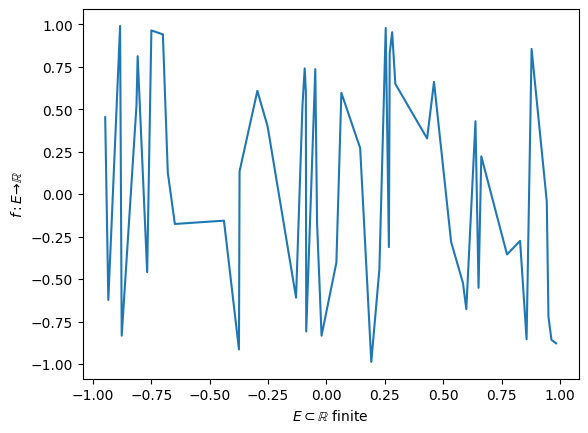

In [30]:
plt.plot(E,f)
plt.xlabel(r'$E\subset \mathbb{R}$ finite')
plt.ylabel(r'$f:E \to \mathbb{R}$')
plt.show()

In [20]:
# A function to compute the minimal Lipschitz constant
def lipnorm(E,f):
  D = np.zeros(len(E)-1)
  for i in range(len(E)-1):
    D[i] = np.abs((f[i+1]-f[i]/(E[i+1]-E[i])))
  return np.max(D)


In [7]:
# distance function
# can be used on arrays
# when applied to arrays, output an array of distances
def dist(x_val,E):
  distances = np.zeros(len(x_val))
  for i, element in enumerate(x_val):
    distances[i] = np.abs(np.min(element - E))
  return distances

In [8]:
# formula for lower and upper lipschitz extension

def lip_ext_lower(x_val,E,f):
  L = lipnorm(E,f)
  F = np.zeros(len(x_val))
  for i, element in enumerate(x_val):
    F[i] = np.max([f[i] - L* np.abs(element-E[i]) for i in range(len(E))])
  return F

def lip_ext_upper(x_val,E,f):
  L = lipnorm(E,f)
  F = np.zeros(len(x_val))
  for i, element in enumerate(x_val):
    F[i] = np.min([f[i] + L* np.abs(element-E[i]) for i in range(len(E))])
  return F


In [31]:
x_val = np.linspace(-1.1,1.1,200)
x_val = np.sort(np.concatenate((x_val,E)))
y_val_lower = lip_ext_lower(x_val,E,f)
y_val_upper = lip_ext_upper(x_val,E,f)

L = lipnorm(E,f)

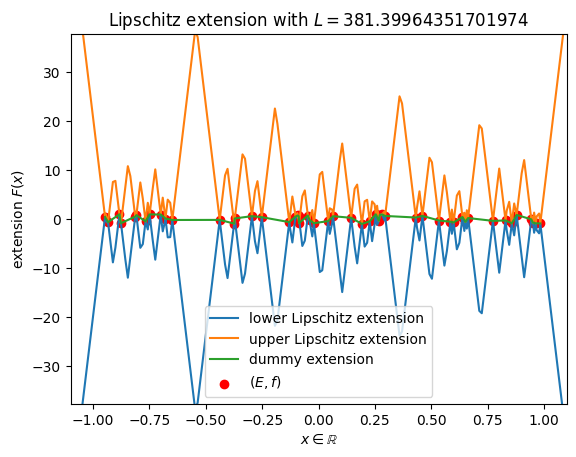

In [32]:
plt.plot(x_val,y_val_lower, label = r'lower Lipschitz extension')
plt.plot(x_val,y_val_upper, label = r'upper Lipschitz extension')
plt.plot(E,f, label = r'dummy extension')
plt.scatter(E,f, color = 'red', label=r'$(E,f)$')
plt.xlim(-1.1,1.1)
plt.ylim(0.1*L*np.min(f),0.1*L*np.max(f))
plt.xlabel(r'$x\in \mathbb{R}$')
plt.ylabel(r'extension $F(x)$')
plt.title(r'Lipschitz extension with $L=$'+str(L))
plt.legend()
plt.show()